In [1]:
import pandas as pd
import numpy as np
import lib_tools as pt # Import Project Tools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import date

start_year = 2005
end_year = 2021

# load data into dictionnaries
dic_usagers = pt.load_usagers(start_year, end_year)
dic_caract = pt.load_caract(start_year, end_year)
dic_vehic = pt.load_vehicules(start_year=start_year, end_year=end_year)
dic_lieux = pt.load_lieux(start_year=start_year, end_year=end_year)

### Preprocessings to build df_usagers, df_caract, df_vehic, df_lieux

In [2]:
chk = True
df_usagers = pt.preproc_usagers(dic_usagers, chk)
df_caract = pt.preproc_caract(dic_caract, chk)
df_vehic = pt.preproc_vehic(dic_vehic, chk)
df_lieux = pt.preproc_vehic(dic_lieux, chk)

somme des lignes 'dic': 2509620
nombre de lignes 'df' : 2509620
nombre de doublons avant traîtement : 2858
nombre de doublons avant traîtement : 0
somme des lignes 'dic': 1121571
nombre de lignes 'df' : 1121571
nombre de doublons avant traîtement : 0
nombre de doublons avant traîtement : 0
somme des lignes 'dic': 1914902
nombre de lignes 'df' : 1914902
nombre de doublons avant traîtement : 0
nombre de doublons avant traîtement : 0
somme des lignes 'dic': 1121571
nombre de lignes 'df' : 1121571
nombre de doublons avant traîtement : 0
nombre de doublons avant traîtement : 0


### Merge data into one DataFrame

In [3]:
df = pt.merge_dataframes(df_usagers=df_usagers, df_caract=df_caract, df_vehic=df_vehic, df_lieux=df_lieux)

### Check graphically for Null values

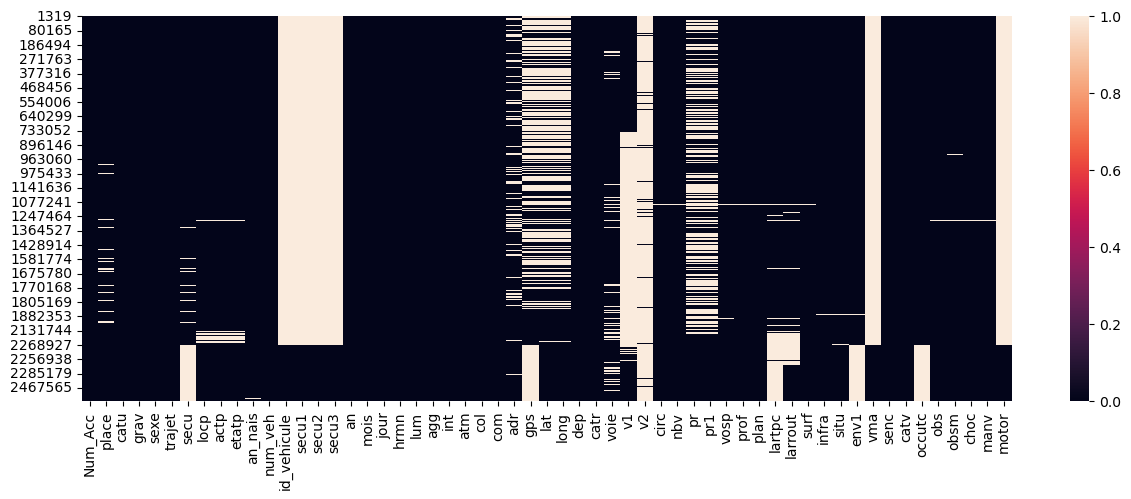

In [4]:
df_sample = df.sample(10000)
df_sample = df_sample.sort_values(by=['an', 'mois', 'jour'], ascending=True)

plt.figure(figsize=(15,5))
ax = sns.heatmap(df_sample.isna());

### Volume des données

In [ ]:
# nb de lignes et colonnes de chaque DataFrame

dic = {'caract' : dic_caract, 'lieux' : dic_lieux, 'usagers': dic_usagers, 'vehic' : dic_vehic}

for key in dic.keys() : 
    print(f"\n{key} : \n")
    nb_lin = []
    nb_col = []
   
    for year in range(start_year, end_year+1):
        dic_data = dic[key]
        df = dic_data[year]
        nb_lin.append(df.shape[0])
        nb_col.append(df.shape[1])
        print(f'{key} {year} : {df.shape[1]} colonnes x {df.shape[0]} lignes')

    print(f"\nnombre de lignes min : {min(nb_lin)}")    
    print(f"\nnombre de lignes max : {max(nb_lin)}")    

### Analyse intercorrelations between variables

In [ ]:
target = df['grav']
data = df.drop(columns=['grav'], axis=1)
# set 'grav' as last column
data['grav'] = target

data = data.fillna(data.median())
# data_clean = data.dropna(how='any')

data_sample = data.sample(10000)
corr = data_sample.corr()

sns.heatmap(corr, annot=False, cmap='coolwarm');
sns.clustermap(corr, annot=False, cmap='coolwarm');

### Evolution de gravité 'Blessé hospitalisé' en 2019?

In [ ]:
df_usagers_2018 = df_usagers[df_usagers['Num_Acc'].astype('str').str[:4] == '2018']
df_usagers_2019 = df_usagers[df_usagers['Num_Acc'].astype('str').str[:4] == '2019']

# sns.histplot(df_usagers_2018.grav)
# ax = plt.hist([df_usagers_2018.grav, df_usagers_2019.grav], color=['r', 'b'], alpha=0.5)


print("\nDistribution de la variable gravité en 2018 : \n")
print(df_usagers_2018.grav.value_counts(normalize=True))

print("\nDistribution de la variable gravité en 2019 : \n")
print(df_usagers_2019.grav.value_counts(normalize=True))
